**Workshop 1, Enrique Santos Fraire, 09/08/2022**

Instructions:

*   You have to REPLICATE and RUN all the Python code, and

*   DO ALL CHALLENGES stated in sections. These challenges can be Python code or just responding QUESTIONS with your own words and in CAPITAL LETTERS. You have to WRITE CLEARLY so that I can see your LINE OF THINKING!

The submissions of your workshops is a REQUISITE for grading your 2 final deliverable documents of the Statistics Module.

I strongly recommended you to write your OWN NOTES about the topics as if it were your study NOTEBOOK.

**2 Descriptive statistics**

Medidas de tendencia central, el propósito es resumir datos crudos con algo que represente a todas las observaciones.

Mediana: 50 percentil

La mejor medida de tendencia central es la mediana, dada la distribución normal. Lo esperado es que la mayor parte de los valores de la variable se encuentren alrededro de la media, sin embargo, hay veces donde la variable no sigue una distribución de probabilidad, muchas veces existe un "skewed" to the right/left.

Esto hace que la media pierda valor dada esta inclinación, pues puede haber muy pocas variables que tengan valores extremadamente altos, la media es muy sensible a los valores extremos, por lo que la mediana nos da una mejor representación de la "media" de una variable.

Medidas de dispersión:
*   Varianza: Avg of squared dev from mean
    *   Promedio de la diferencia de cada valor de x menos su promedio al cuadrado (x - promedio de x)^2
*   Desviación estándar: Avg of dev from mean
*   Percentiles
*   Value at risk

**Good measures for firm size**

Total assets = book value

Market value

**2.3 CHALLENGE: Data management and Descriptive Statistics**

*2.3.1 Data collection and visualization*

Import the following Python libraries:

In [2]:
import numpy as np
import pandas as pd
import pandas_datareader as pdr

# Upgrade libraries
!pip install --upgrade pandas
!pip install --upgrade pandas-datareader

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


The pandas_datareader library has functions to download online data from Yahoo Finance where you can find financial real historical data for stocks, ETFs, cryptocurrencies, etc from most of the financial markets around the world.

Now we download daily prices for Bitcoin from 2017.

In [3]:
BTC = pdr.get_data_yahoo('BTC-USD', start="01/01/2017", interval="d")

Show the content of the data:

In [4]:
BTC

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2017-01-01,1003.080017,958.698975,963.658020,998.325012,147775008,998.325012
2017-01-02,1031.390015,996.702026,998.617004,1021.750000,222184992,1021.750000
2017-01-03,1044.079956,1021.599976,1021.599976,1043.839966,185168000,1043.839966
2017-01-04,1159.420044,1044.400024,1044.400024,1154.729980,344945984,1154.729980
2017-01-05,1191.099976,910.416992,1156.729980,1013.380005,510199008,1013.380005
...,...,...,...,...,...,...
2022-08-26,21804.908203,20199.482422,21596.085938,20260.019531,42326789564,20260.019531
2022-08-27,20340.775391,19890.523438,20262.480469,20041.738281,30116729776,20041.738281
2022-08-28,20139.054688,19616.814453,20041.035156,19616.814453,24366810591,19616.814453


Now show the last quotations:

In [5]:
BTC.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2022-08-26,21804.908203,20199.482422,21596.085938,20260.019531,42326789564,20260.019531
2022-08-27,20340.775391,19890.523438,20262.480469,20041.738281,30116729776,20041.738281
2022-08-28,20139.054688,19616.814453,20041.035156,19616.814453,24366810591,19616.814453
2022-08-29,20357.462891,19600.785156,19615.154297,20297.994141,32637854078,20297.994141
2022-08-30,20496.541016,20151.773438,20273.076172,20425.750000,32476420096,20425.750000


For each period, Yahoo Finance keeps track of the open, high, low, close and adjusted prices. Also, it keeps track of volume that was traded in every period. The adjusted prices are used for stocks, not for currencies. Adjusted prices considered dividend payments and also stock splits.

Then, for the Bitcoin series we can use close price to calculate daily returns.

Import the matplotlib and do a plot for the Bitcoin closing prices:

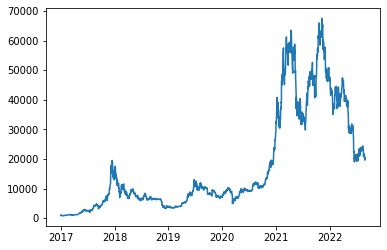

In [6]:
import matplotlib
from matplotlib.pyplot import*
plot(BTC["Close"])
show()

We can check the data types of each variable (column) in the dataset:

In [7]:
BTC.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2068 entries, 2017-01-01 to 2022-08-30
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   High       2068 non-null   float64
 1   Low        2068 non-null   float64
 2   Open       2068 non-null   float64
 3   Close      2068 non-null   float64
 4   Volume     2068 non-null   int64  
 5   Adj Close  2068 non-null   float64
dtypes: float64(5), int64(1)
memory usage: 113.1 KB


The logarithm of prices are very useful for statistical analyis. 

The return of a price or an investment is the % change of the price from one period to the next.

(Porcentaje de cambio de precio de un periode de tiempo a otro.)

A financial simple return for a stock (Rt) is calculated as a percentage change of price from the previous period (t-1) to the present period (t).

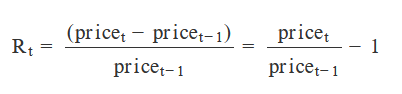

It can be used in decimal or in percentage. It is very recommended to calculate continuously compounded returns (cc returns) and using cc returns instead of simple returns for data analysis, statistics and econometric models.

cc returns are calculated from the natural logarithm of prices.

*2.3.2.3 Continuously compounded returns*

One way to calculate cc returns is by subtracting the log of the current price (at t) minus the log of the previous price (at t-1).

We can also calculate cc returns as the log of the current adjusted price (at t) divided by the previous adjusted price (at t-1).

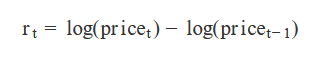

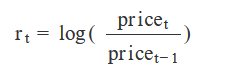

cc returns are usually represented by small r, while simple returns are represented by capital R.

In Python we can get the previous value of a variable using the shift(n) function. This function works for Panda dataframes. Then we can calculate a new column for the simple returns of Bitcoin as follows:

In [8]:
BTC["R"] = (BTC["Close"] / BTC["Close"].shift(1)) - 1
print(BTC["R"])

Date
2017-01-01         NaN
2017-01-02    0.023464
2017-01-03    0.021620
2017-01-04    0.106233
2017-01-05   -0.122410
                ...   
2022-08-26   -0.062075
2022-08-27   -0.010774
2022-08-28   -0.021202
2022-08-29    0.034724
2022-08-30    0.006294
Name: R, Length: 2068, dtype: float64


Now we calculate cc returns in a new column using the shift function:

In [9]:
BTC["r"] = np.log(BTC['Adj Close']) - np.log(BTC['Adj Close'].shift(1))
BTCR = BTC[['R','r']].copy()

We have a null value for the first day since we cannot calculate returns for day 1. We can drop the rows with NA values to ease data calculations:

In [10]:
BTC= BTC.dropna()

*2.3.2.4 Descriptive statistics of returns*

We can use the describe function applied to the r column as follows:

In [11]:
sumret = BTC["R"].describe()
sumret

count    2067.000000
mean        0.002321
std         0.041286
min        -0.371695
25%        -0.015867
50%         0.002089
75%         0.020664
max         0.252472
Name: R, dtype: float64

We see that the mean of daily Bitcoin returns is very close to 0 (0.2%), while standard deviation is above 4.1%! The worse day of Bitcoin was about -37.1%! and the best day was 25.2% of return.

To know which days were the worse, we can do a selection based on a condition. Let’s see which days had a daily return less than 15%:

In [12]:
BTC[BTC["R"]<-0.15]

,High,Low,Open,Close,Volume,Adj Close,R,r
Date,,,,,,,,
2017-09-14,3920.600098,3153.860107,3875.370117,3154.949951,2716310016,3154.949951,-0.187411,-0.207530
2018-01-16,13843.099609,10194.900391,13836.099609,11490.500000,18853799936,11490.500000,-0.168548,-0.184582
2018-02-05,8364.839844,6756.680176,8270.540039,6955.270020,9285289984,6955.270020,-0.159688,-0.173982
2020-03-12,7929.116211,4860.354004,7913.616211,4970.788086,53980357243,4970.788086,-0.371695,-0.464730
2022-06-13,26795.589844,22141.257812,26737.578125,22487.388672,68204556440,22487.388672,-0.159747,-0.174053


The worst day for the Bitcoin was March 12, 2020, which is the beginning of the COVID crisis.

To know the best days for Bitcoin:

In [13]:
BTC[BTC["R"]>0.15].sort_values(by=['R'], ascending=False)

,High,Low,Open,Close,Volume,Adj Close,R,r
Date,,,,,,,,
2017-12-07,17899.699219,14057.299805,14266.099609,17899.699219,17950699520,17899.699219,0.252472,0.225119
2017-07-20,2900.699951,2269.889893,2269.889893,2817.600098,2249260032,2817.600098,0.239361,0.214596
2017-12-06,14369.099609,11923.400391,11923.400391,14291.500000,12656300032,14291.500000,0.199283,0.181724
2021-02-08,46203.929688,38076.324219,38886.828125,46196.464844,101467222687,46196.464844,0.187465,0.171821
2020-03-19,6329.735840,5236.968750,5245.416504,6191.192871,51000731797,6191.192871,0.181878,0.167104
2019-04-02,4905.954590,4155.316895,4156.919434,4879.877930,21315047816,4879.877930,0.173560,0.160042
2019-10-25,8691.540039,7479.984375,7490.703125,8660.700195,28705065488,8660.700195,0.155763,0.144761
2017-07-17,2230.489990,1932.619995,1932.619995,2228.409912,1201760000,2228.409912,0.154724,0.143862
2017-09-15,3733.449951,2946.620117,3166.300049,3637.520020,4148069888,3637.520020,0.152956,0.142330


We can also get the main descriptive statistics using specific functions like:

In [14]:
print("The daily average return of Bitcoin is ", BTC["r"].mean())
print("The daily variance of Bitcoin is ", BTC["r"].var())
print("The daily standard deviation (volatility) of Bitcoin return is ", BTC["r"].std())
print("The daily median return of Bitcoin is ",BTC["r"].median())

The daily average return of Bitcoin is  0.00146031579677387
The daily variance of Bitcoin is  0.001730680861420213
The daily standard deviation (volatility) of Bitcoin return is  0.041601452635938244
The daily median return of Bitcoin is  0.002087127436135816


**3.2 CHALLENGES: Histogram**

*   Do a histogram for daily Bitcoin cc returns. Hints: use the plot.hist function for pandas dataframes, and the BTC dataframe.
*   Interpret the histogram with your own words and in CAPITAL LETTERS

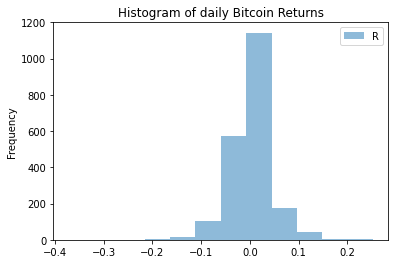

In [15]:
r_bitcoin = pd.DataFrame(BTC[["R"]])
hist=r_bitcoin.plot.hist(bins=12,alpha=0.5,title="Histogram of daily Bitcoin Returns")

**Interpretación**

PODEMOS OBSERVAR EN EL HISTOGRAMA QUE EL BITCOIN TIENDE A MANTENER UNA TASA DE CAMBIO CERCANA AL CERO DIARIAMENTE, LEVEMENTE POR ARRIBA DE ESTE. AUNQUE IGUALMENTE HAY REGISTROS DONDE SE VE DISMINUIDO SU VALOR DE MANERA MÁS NOTORIA EN COMPARACIÓN A SU CONTRAPARTE POSITIVA, POR LO QUE LAS CAÍDAS TENDRÁN UN IMPACTO MAYOR QUE LAS SUBIDAS CUANDO SUCEDAN.

We use the histogram to visualize random variables with historical values. For expected values of random variables we can use the concept of probability density function, which is analogous to the concept of the histogram, but applied to the expectation of possible values of a random variable.

**5 The Normal Distribution Function**

The most popular continuous PDF (Probability density function) is the well-known “bell-shaped” normal distribution, which PDF is defined as:

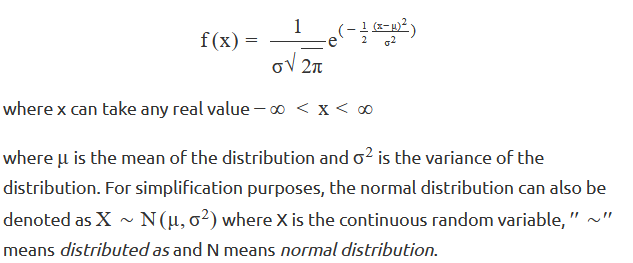

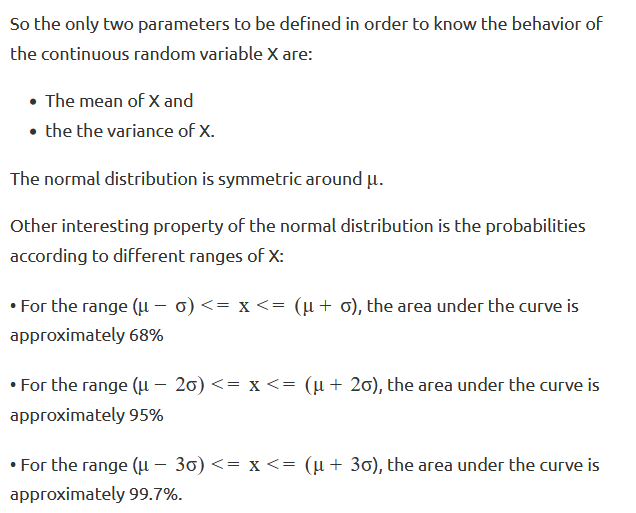

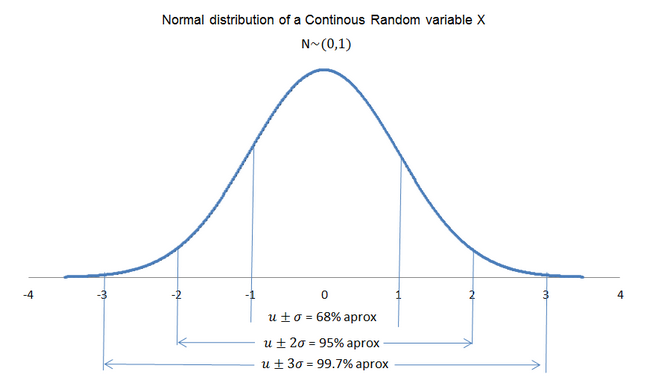

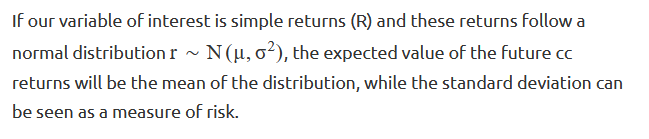

**5.2 CHALLENGE: Simulating the normal distribution**

Use the mean and standard deviation of the historical cc returns of Bitcoin and simulate the same # of returns as the days we dowloaded in the BTC dataframe.

In one plot show both, the real distribution of historical cc returns and the simulated normal distribution.

DO YOU SEE A DIFFERENCE BEWEEN THE REAL VS THE SIMULATED RETURNS? BRIEFLY EXPLAIN.

In [16]:
ccr_mean=BTC["r"].mean()
ccr_std=BTC["r"].std()
ccr_size=len(BTC)

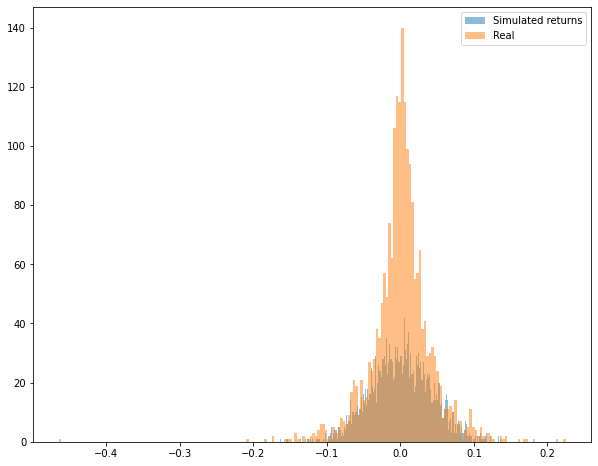

In [24]:
from matplotlib import pyplot

ccr_bitcoin = pd.DataFrame(BTC[["r"]])

bins=200

simulated_r = np.random.normal(loc=ccr_mean, scale=ccr_std, size=ccr_size)

pyplot.figure(figsize = (10, 8))
pyplot.hist(simulated_r, bins, alpha=0.5, label="Simulated returns")
pyplot.hist(ccr_bitcoin.to_numpy(), bins, alpha=0.5, label="Real")
pyplot.legend(loc="upper right")
pyplot.show()

**Interpretación**

POPDEMOS VER QUE CON LOS DATOS ALEATORIOS SE CUENTA CON UNA MEJOR DISTRIBUCIÓN NORMAL, FORMANDO UNA ADECUADA CAMPANA DE GAUSS, EN COMPARACIÓN A LOS DATOS REALES DONDE TENEMOS PICOS MÁS ALTOS Y DISPERSIÓN EN LOS EXTREMOS, LO CUAL NOS HACE VER NUEVAMENTE LA VOLATILIDAD DE LA CRIPTOMONEDA Y EL VALOR DE RIESGO QUE PRESENTA.